In [1]:
!pip install --upgrade sklearn
!pip install --upgrade pandas

Requirement already up-to-date: sklearn in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s440-f39bd962225440-fe8dadcb5f83/.local/lib/python2.7/site-packages
Requirement already up-to-date: scikit-learn in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s440-f39bd962225440-fe8dadcb5f83/.local/lib/python2.7/site-packages (from sklearn)
Requirement already up-to-date: pandas in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s440-f39bd962225440-fe8dadcb5f83/.local/lib/python2.7/site-packages
Requirement already up-to-date: pytz>=2011k in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s440-f39bd962225440-fe8dadcb5f83/.local/lib/python2.7/site-packages (from pandas)
Requirement already up-to-date: numpy>=1.9.0 in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s440-f39bd962225440-fe8dadcb5f83/.local/lib/python2.7/site-packages (from pandas)
Requirement already up-to-date: python-dateutil in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s440-f39bd962225440-fe8dadcb5f83/.local/lib/python2.7/site-pac

# Dataset αναγνώρισης αντικειμένων σε εικόνα

Σε αυτή την άσκηση θα προεπεξεργαστούμε μια σειρά χαρακτηριστικών χαμηλού επιπέδου που έχουν εξαχθεί από τμήματα εικόνων, και στη συνέχεια θα εκπαιδεύσουμε έναν νευρωνικό δίκτυο που θα τις κατατάσσει σε μία από τις 5 διαφορετικές κατηγορίες στις οποίες μπορεί να ανήκουν.

![alt text](https://cdn-images-1.medium.com/max/1600/1*r9ELExnk1B1zHnRReDW9Ow.png)

Ένα από τα πιο δημοφιλή προβλήματα στο χώρο της σημασιολογικής ανάλυσης πολυμεσικού υλικού αποτελεί η ταξινόμηση τμημάτων εικόνων με βάση το περιεχόμενο. Μια συνηθισμένη διαδικασία για την επίτευξη αυτού του σκοπού έχει ως εξής. Αρχικά ένας αλγόριθμος τμηματοποίησης επεξεργάζεται την εικόνα και τη χωρίζει σε περιοχές με παρόμοια χαρακτηριστικά χαμηλού επιπέδου (για παράδειγμα ιστογράμματα χρώματος, αναγνώριση ακμών κλπ). Τα τμήματα αυτά ταξινομούνται χειροκίνητα σύμφωνα με το περιεχόμενο τους σε κάποιες κατηγορίες. Με αυτό το τρόπο δημιουργείται ένα σύνολο εκπαίδευσης (χαρακτηριστικά και επιθυμητές αποκρίσεις) το οποίο χρησιμοποιείται από ένα νευρωνικό δίκτυο για την ταξινόμηση των τμημάτων της εικόνας. Οι πίνακες που μας δίνονται για την εκπαίδευση του δικτύου έχουν τα εξής περιεχόμενα:

1. Κάθε στήλη του πίνακα TrainData αντιστοιχεί στο τμήμα μίας εικόνας ενώ κάθε γραμμή περιέχει χαρακτηριστικά χαμηλού επιπέδου (που αντιστοιχούν σε Descriptors) του τμήματος αυτού. Γνωρίζομε ότι το σύνολο τμημάτων εικόνας - κολόνων στο train set είναι 645 και ότι το σύνολο των χαρακτηριστικών - γραμμών είναι 586. 
2. Κάθε στήλη του πίνακα TrainDataTargets αντιστοιχεί στο τμήμα μίας εικόνας ενώ κάθε γραμμή αντιστοιχεί σε μία από τις κατηγορίες «Άλογο», «Σκύλος», «Πρόσωπο», «Αυτοκίνητο», «Ποδήλατο», «Λουλούδι» κ.ά. Γνωρίζουμε ότι το σύνολο των στηλών - δειγμάτων στο test set είναι 159 και ότι το σύνολο των κατηγοριών - γραμμών είναι 5 (Για την υλοποίηση της άσκησης έχουν δηλαδή επιλεγεί 5 μόνο κατηγορίες αντικειμένων). Στην περίπτωση που το τμήμα μιας εικόνας ανήκει σε μία από τις κατηγορίες τότε η αντίστοιχη γραμμή θα έχει την τιμή 1 ενώ οι υπόλοιπες γραμμές θα πάρουν την τιμή 0.

Τα δεδομένα των πινάκων TrainData, TrainDataTargets θα χρησιμοποιηθούν για την εκπαίδευση του νευρωνικού δικτύου ενώ τα δεδομένα των πινάκων TestData, TestDataTargets θα χρησιμοποιηθούν ως μέτρο των επιδόσεων του νευρωνικού δικτύου. Προφανώς τα δεδομένα των πινάκων TestData και TestDataTargets έχουν αντίστοιχη δομή με τα δεδομένα των πινάκων TrainData και TrainDataTargets. 

Οι πίνακες των χαρακτηριστικών και ετικετών του train και test set στην περίπτωση αυτή μας δίνονται έτοιμοι και δεν κάνουμε εμείς split του dataset.


# Εισαγωγή και επισκόπηση των δεδομένων

Το πρώτο βήμα όταν διαχειριζόμαστε datasets είναι να τα εισάγουμε σωστά στο περιβάλλον μας και να βεβαινώμαστε ότι οι πίνακες έχουν τη σωστή μορφή.

## Εισαγωγή dataset

Τα δεδομένα είναι αποθηκευμένα σε αρχεία .csv και πρέπει να τα εισάγουμε σε μορφή πινάκων της numpy. 

Στο DSX, πατώντας το εικονίδιο Find and Add Data
![alt text](https://datascience.ibm.com/docs/api/content/analyze-data/images/finddata.png)

μπορούμε να κάνουμε drag and drop τα αρχεία στο γραφικό περιβάλλον έτσι ώστε να εμφανιστούν στα "Notebook Assets". Αυτά τα αρχεία είναι τώρα διαθέσιμα και μπορούμε να τα χρησιμοποιήσουμε πατώντας insert to code->Insert StringIO object. 

Τα δεδομένα έχουν αποθηκευθεί στα δικά μας DSX και μπορείτε να τα εισάγετε απλά τρέχοντας το επόμενο μπλοκ. Ουσιαστικά γίνεται data sharing μέσω credentials, έτσι μπορείτε να κάνετε share ένα notebook μαζί με τα δεδομένα του, χωρίς ξεχωριστό αρχείο.

In [2]:
from io import StringIO
import requests
import json
import pandas as pd


# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_a91e2c870e864af8b95c0b2a8a4f7013(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_a39c4bbc27ebd08ea509e7ad46d8e7d19ab713aa','domain': {'id': 'f0f038582ef444f58a39491c6ccf1a3c'},
            'password': 'lG)[j{yr1/.2f)N*'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)


testData = pd.read_csv(get_object_storage_file_with_credentials_a91e2c870e864af8b95c0b2a8a4f7013('DefaultProjectmikegiatziimagentuagr', 'testData.csv')).values
testDataTargets = pd.read_csv(get_object_storage_file_with_credentials_a91e2c870e864af8b95c0b2a8a4f7013('DefaultProjectmikegiatziimagentuagr', 'testDataTargets.csv')).values
trainDataTargets = pd.read_csv(get_object_storage_file_with_credentials_a91e2c870e864af8b95c0b2a8a4f7013('DefaultProjectmikegiatziimagentuagr', 'trainDataTargets.csv')).values
trainData = pd.read_csv(get_object_storage_file_with_credentials_a91e2c870e864af8b95c0b2a8a4f7013('DefaultProjectmikegiatziimagentuagr', 'trainData.csv')).values

Γνωρίζομε ότι csv μας περιέχουν μόνο αριθμητικά δεδομένα οπότε  καλώντας τη μέθοδο .values τα δεδομένα μετατρέπονται αυτόματα σε πίνακα numpy αντί για data_frame. Προσοχή: σε csv που περιεχουν συνδυασμό strings και αριθμών ακολουθούμε τη μεθδολογία με διαφορετικά dataframes ανάλογα των τύπο δεδομένων που είδαμε στο τελευταίο section του notebook "Classification 1.1." 

## Multi-class dataset format

Όταν έχουμε c διαφορετικές κλάσεις το scikit περιμένει το dataset να έχει την ακόλουθη μορφή:

- ο πίνακας των δεδομένων να έχει σχήμα (n samples, m features)
- ο πίνακας των ετικετών να έχει σχήμα(n samples, c κλάσεις)

Εάν έχουμε 3 κλάσεις και ένα δείγμα ανήκει στην 1, τότε η ετικέτα του θα είναι [0 1 0]. Αυτή είναι η πυκνή αναπαράσταση (dense). Μπορούμε επίσης να έχουμε την αραιή (sparse) αναπαράσταση:

- ο πίνακας των δεδομένων να έχει σχήμα (n samples, m features)
- ο πίνακας των ετικετών να έχει σχήμα (n samples, ετικέτα κλάσης)

ένα δείγμα της κατηγορίας 3 θα έχει ετικέτα '2' (δηλαδή 3 ξεκινώνατας το index από το 0). 

Το scikit καταλαβαίνει και τις δύο συμβάσεις για τις ετικέτες πολλών κατηγοριών. Τα ονόματα δεν χρειάζεται καν να είναι 1, 2 κλπ αρκεί να είναι μοναδικά. Γενικά προτιμάται η αναπαράσταση sparse. H dense μετατρέπεται εσωτερικά σε sparse.


## Επισκόπηση του Dataset

Αφού εισάγουμε τα δεδομένα και έχουμε τις κλάσεις με τις οποίες επιθυμούμε να δουλέψουμε, πρέπει να κάνουμε έναν αρχικό έλεγχο και να δούμε αν είναι σε κατάλληλη μορφή. Πολλές φορές τα δεδομένα έχουν αντίστροφα από το επιθυμητό τις σειρές και τις στήλες, ή περιέχουν κατηγορίες (indexes) που κατά λάθος μπορεί να περάσουμε σαν έξτρα σειρές στους πίνακές μας. Σημείωση: ένας από τους λόγους που πολλοί επιστήμονες δεδομένων επιλέγουν να δουλεύουν με panda data_frames αντί απλά arrays είναι το ότι διαχειρίζονται αυτόματα τα indexes των δεδομένων. 

Πρέπει πάντοτε να κάνουμε μια επισκόπηση των πινάκων να δούμε αν είναι στη σωστή μορφή, ειδικά όταν δεν έχουμε dataset description (δηλαδή τί σημαίνουν οι κολώνες και οι γραμμές), όπως στην περίπτωση αυτή.

In [3]:
# παίρνουμε πρώτα τις διαστάσεις όλων των πινάκων
print trainData.shape
print trainDataTargets.shape
print testData.shape
print testDataTargets.shape
print "\n"

# κάνουμε μια πρώτη εκτύπωση των χαρακτηριστικών
print trainData
print testData
print trainDataTargets
print testDataTargets

(586, 646)
(5, 646)
(586, 160)
(5, 160)


[[   1  -66 -168 ...,  -44 -124 -107]
 [   2  -72   70 ...,   49   69   38]
 [   3 -124   70 ...,    0   60    7]
 ..., 
 [ 584  129   25 ...,   88   92  116]
 [ 585  127    5 ...,   92  101  123]
 [ 586  139    5 ...,  114  126  154]]
[[   1 -153 -164 ...,  -62  -96  -82]
 [   2   70   69 ...,  -29  -16  -16]
 [   3   65   64 ..., -126  -94 -108]
 ..., 
 [ 584   36   35 ...,  139  130  139]
 [ 585    3    0 ...,  150  128  144]
 [ 586    5    8 ...,  177  141  165]]
[[1 1 0 ..., 0 0 0]
 [2 0 0 ..., 0 0 0]
 [3 0 0 ..., 1 1 1]
 [4 0 0 ..., 0 0 0]
 [5 0 1 ..., 0 0 0]]
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
  0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 0 1 1 1 1 1 1 1]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

Οι παρατηρήσεις που κάνουμε είναι δύο. Πρώτον, τα χαρακτηριστικά είναι σε γραμμές και τα δείγματα σε κολόνες. Δεύτερον, οι κολόνες - δείγματα αντί να είναι 645 είναι 646. Από το print λοιπόν βλέπουμε ότι η διάσταση αυτή είναι λάθος γιατί η πρώτη κολώνα είναι ένα index από 1 μέχρι το 586 των χαρακτηριστικών. Συνεπώς αυτό το index θα πρέπει να το αφαιρέσουμε (δεν αποτελεί δείγμα) και εν συνεχεία να κάνουμε αναστροφή στους πίνακες ώστε να έχουμε δείγματα στις γραμμές και χαρακτηριστικά στις κολώνες. Επίσης για τις ετικέτες των κατηγοριών, θέλουμε να έχουμε τα δείγματα σε γραμμές και τα 0 και 1 των κατηγοριών σε 5 κολόνες, οπότε θα χρειαστούμε και εκεί αναστροφή των πινάκων.

In [4]:
# C for Corrected
C_trainData = trainData.T[1:,]
C_testData = testData.T[1:,]
C_trainDataTargets = trainDataTargets.T[1:,]
C_testDataTargets = testDataTargets.T[1:,]

print C_trainData.shape
print C_trainDataTargets.shape
print C_testData.shape
print C_testDataTargets.shape
print "\n"

#τυπώνουμε τις 5 πρώτες γραμμές και κολόνες
print C_trainData[:5,:5]
print C_trainDataTargets[:5,:5]
print C_testData[:5,:5]
print C_testDataTargets[:5,:5]


(645, 586)
(645, 5)
(159, 586)
(159, 5)


[[ -66  -72 -124   54   26]
 [-168   70   70    8    8]
 [-172   72   54   18    8]
 [ -63  -23  -99   54  -18]
 [ -62   43  -18   63    8]]
[[1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 1 0 0 0]
 [0 1 0 0 0]]
[[-153   70   65    3    5]
 [-164   69   64   15    8]
 [-157   73   71    2    8]
 [-133   63   71   -2    1]
 [-137   65   71    4    8]]
[[0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


Συμερασματικά: είναι πάντα καλή πρακτική να κάνουμε μια ποιοτική επισκόπηση του dataset και να εξετάζουμε αν οι πίνακες των δεδομένων είναι στη σωστή μορφή και να τους διορθώνουμε αν χρειαστεί. Μπορούμε να έχουμε ή να μην έχουμε ονόματα χαρακτηριστικών στην πρώτη γραμμή η κολώνα, αρίθμηση σειρών, να λείπουν τιμές χαρακτηριστικών, να έχουμε μαζί αριθμητικές και κατηγορικές μεταβλητές (strings) 

Στη συνεχεία θα κάνουμε κάποιες διαδικασίες προεπεξεργασίας στα δεδομένα για να βελτιώσουμε την απόδοση των ταξινομητών. Για να δούμε τη διαφορά πριν και μετά την προεπεξεργασία, κάνουμε εκπαίδευση σε ένα Multi Layer Perceptron (MLP) με default παραμέτρους (σταθερές, που δεν τις βελτιστοποιούμε) στα αρχικά, μη επεξεργασμένα, δεδομένα και υπολογίζουμε precision, recall, f1. Θα δούμε ότι το MLP αδυνατεί να μάθει να κάνει προβλέψεις.

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5,), random_state=1)
clf.fit(C_trainData, C_trainDataTargets)
preds = clf.predict(C_testData)
print classification_report(C_testDataTargets, preds)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        42
          1       0.00      0.00      0.00        30
          2       0.00      0.00      0.00        30
          3       0.00      0.00      0.00        26
          4       0.00      0.00      0.00        31

avg / total       0.00      0.00      0.00       159



/gpfs/fs01/user/s440-f39bd962225440-fe8dadcb5f83/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Το μοντέλο δεν λειτουργεί γιατί οι 5 νευρώνες του κρυμμένου επιπέδου είναι πολύ λίγοι για να μάθει τα πρότυπα εισόδου στη μη επεξεργασμένη τους μορφή και να μπορέσει να διαχωρίσει τις κλάσεις. Αν τους αυξήσουμε σε 15 θα λειτουργήσει αλλά με μέτρια αποτελέσματα.

# Προεπεξεργασία δεδομένων

Αφού εισάγαμε τα δεδομένα και κάναμε μια πρώτη επισκόπηση και τα φέραμε στη σωστή μορφοποίηση, περνάμε στο επόμενο στάδιο, αυτό της προεπεξεργασίας (data preprocessing). Σε πολλά προβλήματα ταξινόμησης (και machine learning γενικότερα) η προεπεξεργασία είναι ένα πολύ σημαντικό κομμάτι (και συχνά πολύ χρονοβόρο) ολόκληρης της διαδικασίας το οποίο όμως συχνά έχει πολύ μεγάλο αντίκτυπο στην επίδοση του συστήματος.  Σε αυτή την ενότητα θα κάνουμε μια εισαγωγή στα βασικά βήματα προεπεξεργασίας και το πώς το υλοποιούμε σε Python. 

## Dataset με αριθμητικά και κατηγορικά χαρακτηριστικά
Σε κάποιες περιπτώσεις τα datasets περιέχουν και αριθμητικά και κατηγορικά χαρακτηριστικά. Για παράδειγμα:

In [6]:
import numpy as np
# Όνομα Ηλικία Βάρος Κάτοικος
MixedType = np.array([
    ['John', 25, 63.2, 'UK'],
    ['Maria', 62, 54.3, 'US'],
    ['Nick', 18, 70.3, 'US'],
])
print MixedType

[['John' '25' '63.2' 'UK']
 ['Maria' '62' '54.3' 'US']
 ['Nick' '18' '70.3' 'US']]


Για να μπορέσει ο ταξινομητής να λειτουργίσει, θα μπορούσε κανείς να σκεφτεί να αντικαταστήσει κάθε διαφορετική τιμή κάθε κατηγορικού χαρακτηριστικού με μια αριθμητική τιμή. Στο προηγούμενο παράδειγμα να θέσει John=0, Maria=1, Nick=2 και Europe=0, US=1. Αυτό όμως είναι λάθος γιατί θεωρεί ότι το σύνολο τιμών των δύο κατηγορικών μεταβλητών είναι διατεταγμένο (ordered) κάτι που προφανώς δεν ισχύει και θα οδηγήσει σε λάθη τον ταξινομητή.

Μια λύση είναι να μετατρέψουμε κάθε κατηγορικό χαρακτηριστικό με m τιμές σε m binary χαρακτηριστικά από τα οποία μόνο ένα είναι ένεργό κάθε φορά:

In [7]:
# μετατρέπουμε σε dataframe και τυπώνουμε
df = pd.DataFrame(MixedType)
print df
# οι κολ΄όνες 0 και 3 έχουν κατηγορικές μεταβλητές. 
# Με την "get_dummies" κάνουμε τη μετατροπή σε binary χαρακτηριστικά που περιγράψαμε
dummies = pd.get_dummies(df, columns=[0,3])
print dummies
# Μετατρέπουμε σε αριθμητικές τιμές (pd.to_numeric) και σε numpy array (.values)
np_dummies = dummies.apply(pd.to_numeric).values
print np_dummies

       0   1     2   3
0   John  25  63.2  UK
1  Maria  62  54.3  US
2   Nick  18  70.3  US
    1     2  0_John  0_Maria  0_Nick  3_UK  3_US
0  25  63.2       1        0       0     1     0
1  62  54.3       0        1       0     0     1
2  18  70.3       0        0       1     0     1
[[ 25.   63.2   1.    0.    0.    1.    0. ]
 [ 62.   54.3   0.    1.    0.    0.    1. ]
 [ 18.   70.3   0.    0.    1.    0.    1. ]]


## Η κατάρα της διαστατικότητας (Curse of dimensionality)

Μια πολύ σημαντική παράμετρος για την απόδοση των ταξινομητών είναι η διάσταστικότητα των δεδομένων, ιδιαίτερα σε σχέση με τον διαθέσιμο αριθμό δειγμάτων. Γενικά και ανεξάρτητα από το μοντέλο του ταξινομητή, η απόδοση αυξάνεται όσο αυξάνεται το πλήθος και η ποιότητα των δεδομένων και όσο μειώνεται η διαστατικότητα. Αντίστροφα, τα προβλήματα δυσκολεύουν όσο η διαστατικότητα αυξάνεται και τα δείγματα δεν επαρκουν για να καλύψουν όλες τις κατηγορίες του προβλήματος. Αναφερόμαστε στο πρόβλημα αυτό ώς την κατάρα της διαστατικότητας (the curse of dimensionality): όσο αυξάνει η διαστατικότητα, τόσο τα διαθέσιμα δεδομένα γίνονται αραιά (sparse). 

Ας πούμε ότι έχουμε n-διάστασης κατηγορικές μεταβλητές, με δυαδικές τιμές $x_n = 0$ ή $x_n = 1$, που περιγράφουν πχ εικόνες. Θέλουμε να μετρήσουμε πόσα αντιπροσωπευτικά παραδείγματα πρέπει να έχουμε για να καλύψουμε όλες τις κατηγορίες. Αν n=1, θέλουμε 2 παραδείγματα, αν n=2 θέλουμε 4 κ.ο.κ. δηλαδή θέλουμε $n^2$ παραδείγματα ανάλογα την διάσταση. Εαν όμως έχουμε πάνω από 2 κατηγορίες σε κάθε μεταβλητή, δηλαδή $x_n = r, r >2$, τότε αντίστοιχα έχουμε $n^r$ δυνατές *περιοχές* που χωρίζουμε τον υπερχώρο.

Στο παράδειγμα μας οι μεταβλητές έχουν διάσταση n = 586 με πραγματικές τιμές και μόνο 645 δείγματα, επομένως καταλαβαίνει κανείς ότι χωρίς μείωση της διάστασης των μεταβλητών εισόδου με κάποιον τρόπο, η απόδοση όποιου ταξινομητή και να χρησιμοποιήσουμε θα υπονομεύεται από τον μικρό αριθμό παραδειγμάτων, δεδομένης της διαστατικότητας.


![alt text](https://www.kdnuggets.com/wp-content/uploads/curse-dimensionality-2.png)


Σε γενικές γραμμές λοιπόν οι πολύ μεγάλες διαστάσεις του χώρου εισόδου (χαρακτηριστικών) κάνουν δύσκολότερο για τον ταξινομητή να υπολογίσει το σύνορο απόφασης μεταξύ των κλάσεων και αυξάνουν τις απαιτήσεις χώρου και χρόνου εκπαίδευσης ή/και ταξινόμησης. 

Για να μειωθεί η διαστατικότητα των δεδομένων χρησιμοποιούμε τεχνικές **μείωσης διαστάτικότητας (dimensionality reduction)**. To dimensionality reduction γίνεται με τεχνικές επιλογής χαρακτηριστικών (feature selection) όπου ουσιαστικά αφαιρούμε κάποια χαρακτηριστικά με βάση ένα κριτήριο χωρίς μετασχηματισμό των τιμών τους και τεχνικές εξαγωγής χαρακτηριστικών (feature extraction), όπου μετασχηματίζουμε τις τιμές των χαρακτηριστικών σε νέες (εξάγουμε δηλαδή νέα χαρακτηριστικά) αλλά σε ένα χώρο μικρότερων διαστάσεων.

## Μείωση διαστάσεων εισόδου με επιλογή χαρακτηριστικών

Για την επιλογή χαρακτηριστικών υπάρχουν πολλές διαφορετικές τεχνικές (πχ [εδώ](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) οι επιλογές του scikit-learn). Μια απλή τεχνική επιλογής χαρακτηριστικών είναι το ελάχιστο κατώφλι της διακύμανσης (Variance threshold). Σε γενικές γραμμές αν η διακύμανση ενός χαρακτηριστικού εισόδου είναι πολύ χαμηλή, δεν μπορεί να προσφέρει σημαντικά στη διαχωριστική ικανότητα του ταξινομητή. Ειδικά στην περίπτωση που η διακύμανση είναι 0, δηλαδή το χαρακτηριστικό εχει σταθερή τιμή για όλα τα δείγματα εκπαίδευσης, δεν χρησιμέυει καθόλου στον ταξινομητή για να αποφασίσει αν ένα δείγμα ανήκει σε μία κλάση ή σε μια άλλη και επιπλέον μπορεί να δυσκολέψει άλλες διαδικασίες της προεπεξεργασίας όπως η κανανικοποίηση των χαρακτηριστικών. 

Μπορούμε να χρησιμοποιήσουμε τη συνάρτηση VarianceThreshold για να αφαιρέσουμε τα  χαρκτηριστικά στο training set που έχουν μηδενική διακύμανση (default) ή πολύ χαμηλή. Πρέπει επίσης να πάρουμε μια μάσκα (index) των χαρακτηριστικών που επιλέγουμε, ώστε να την εφαρμόσουμε και στα δεδομένα train ώστε να έχουν τις ίδιες διαστάσεις. Αυτό δεν σπάει τον κανόνα ότι δεν χρησιμοποιούμε τα δεδομένα test γιατί μπορούμε να θεωρήσουμε ότι ο ταξινομητής απλώς αγνοεί τις εισόδους που δεν περιλαμβάνονται στη μάσκα.  Ας δούμε τη VarianceThreshold σε ένα toy dataset:

In [8]:
from sklearn.feature_selection import VarianceThreshold

train = np.array([[2, 2, 0, 3], [3, 1, 4, 3], [0, 1, 1, 3]])
print train
# αρχικοποιούμε έναν selector
selector = VarianceThreshold()
# όπως κάναμε και με τους ταξινομητές τον κάνουμε fit στα δεδομένα εκπαίδευσης
train_reduced = selector.fit_transform(train)
print train_reduced
mask = selector.get_support()
print mask

test = np.array([[1, 2, 5, 3], [3, 4, 0, 3], [0, 3, 2, 0]])
# καθώς δεν ξέρουμε τί θα συμβεί στο test set δεν αποκλείεται η υπόθεση της μηδενικής διακύμανσης του 4ου χαρακτηριστικού μπορεί και να μην είναι απόλυτα σωστή. Ωστόσο θα είναι πρακτικά αμελητέα.
test_reduced = test[:,mask]
print test_reduced

[[2 2 0 3]
 [3 1 4 3]
 [0 1 1 3]]
[[2 2 0]
 [3 1 4]
 [0 1 1]]
[ True  True  True False]
[[1 2 5]
 [3 4 0]
 [0 3 2]]


Ενώ οι σταθερές τιμές πρέπει να αφαιρούνται κατά κανόνα πάντα, μπορεί κανείς να δοκιμασει με μεγαλύτερα κατώφλια από μηδέν αφαιρώντας και χαρακτηριστικά που έχουν κάποια διακύμανση και να αξιολογεί την επίδραση που έχει η περαιτέρω μείωση των διαστάσεων στην επίδοση του ταξινομητή.

Αφαιρούμε τις κολόνες με 0 variance (σταθερές) από το dataset μας:

In [9]:
selector = VarianceThreshold()
train_reduced = selector.fit_transform(C_trainData)
mask = selector.get_support()
test_reduced = C_testData[:,mask]

print train_reduced.shape
print test_reduced.shape
# διαπιστώνουμε σημαντική μείωση

(645, 445)
(159, 445)


## Κανονικοποίηση χαρακτηριστικών

Μετά την επιλογή χαρακτηριστικών η επόμενη τεχνική προεπεξεργασίας που μπορούμε να κάνουμε είναι η κανονικοποίηση των χαρακτηριστικών. Χαρακτηριστικά με πολύ μεγάλες διαφορές στις απόλυτες τιμές τους μπορούν να προκαλέσουν προβλήματα στην εκπαίδευση και να δώσουν ταξινομητές με μη βέλτιστη απόδοση. Για παράδειγμα ένα χαρακτηριστικό με πολύ μεγάλες τιμές θα έχει μεγαλύτερη επίδραση στον υπολογισμό της απόστασης στον kNN απότι ένα με μικρές τιμές, χωρίς αυτό να σημαίνει απαραίτητα ότι είναι περισσότερο καθοριστικό για το διαχωρισμό των κλάσεων. Η κανονικοποίηση μετασχηματίζει τις τιμές των χαρακτηριστικών ώστε να αμβλυνθούν αυτές οι διαφορές.

Η κανονικοποίηση των χαρακτηριστικών μπορεί να γίνει με 2 βασικούς τρόπους, γνωστούς και από τη στατιστική. Με την διαίρεση με τη διαφορά μεγίστου-ελαχίστου (feature scaling) οπότε οι τιμές όλων των χαρακτηριστικών κλιμακώνονται γραμμικά στο διάστημα [0,1] ή με το z-score (ή standard score) του κάθε χαρακτηριστικού (standardization), που κάνει το χαρακτηριστικό να έχει μέση τιμή μηδέν και διακύμανση μονάδα, σαν την κανονική κατανομή. 

Η μετατροπή μεγίστου ελαχίστου γίνεται με τον τύπο $$X' = {X - X_{min} \over X_{max} - X_{min}}$$Η μετατροπή σε standard score γίνεται με τον τύπο: $$z = {X- \mu \over \sigma}$$ όπου: $μ$ είναι η μέση τιμή του χαρακτηριστικού και $σ$ η απόκλιση. Στην πράξη δεν μας ενδιαφέρει αν η πραγματική κατανομή των χαρακτηριστικών είναι κανονική, απλά αφαιρούμε τη μέση τιμή και διαιρούμε με την απόκλιση για να έχουν τα χαρακτηριστικά της.

H μετατροπή σε standard score είναι απαραίτητη σε πολλούς ταξινομητές για να συμπεριφερθούν σωστά. Επίσης είναι πιο ανθεκτική από την min max σε τιμές outliers δηλαδή σποραδικές τιμές που είναι πολύ μακριά απο τη μέση τιμή και τις υπόλοιπες τιμές του χαρακτηριστικού (η min max θα συμπιέσει τις περισσότερες τιμές σε ένα μικρό διάστημα)

Από την άλλη η κλιμάκωση σε [0,1] είναι λιγότερο ευαίσθητη σε πολυ μικρές αποκλίσεις και επίσης σε αραιά (sparse) διανύσματα χαρακτηριστικών (δηλαδή με πολλές μηδενικες τιμές) η εφαρμογή της διατηρεί τα μηδέν, κάτι που μπορεί να είναι καθοριστικό για την ταχύτητα εκπαίδευσης.

10 τυχαίες τιμές από -30 ως 30


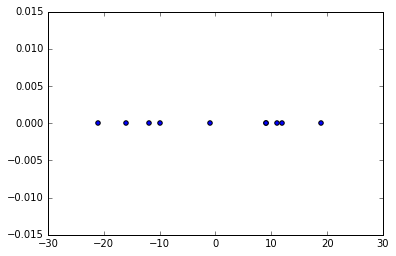

οι προηγούμενες 10 τιμές από -30 ως 30 και το οutlier 100


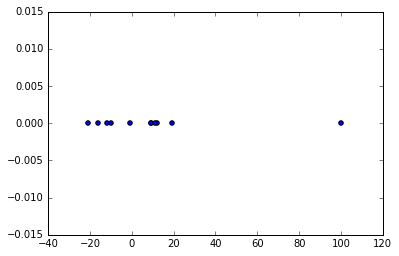

οι προηγούμενες 11 τιμές κανονικοποιημένες στο [0,1]


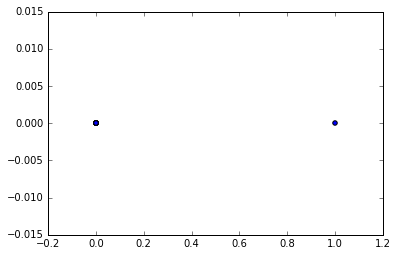

οι προηγούμενες 11 standarized


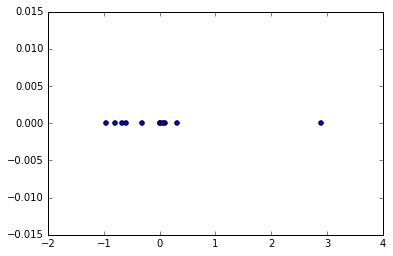

In [10]:
import matplotlib.pyplot as plt
from scipy import stats as st

x= np.random.randint(-30,30, size=10)
y = [0]*len(x)
plt.scatter(x,y)
print "10 τυχαίες τιμές από -30 ως 30"
plt.show()

# προσθέτουμε τον outlier 150
x = np.append(x,100)
y = [0]*len(x)
plt.scatter(x,y)
print "οι προηγούμενες 10 τιμές από -30 ως 30 και το οutlier 100"
plt.show()

# κανονικοποίηση στο [0,1] με min max
min_max_x = (x - np.min(x) )/ (np.max(x) - np.min(x))
plt.scatter(min_max_x,y)
print "οι προηγούμενες 11 τιμές κανονικοποιημένες στο [0,1]"
plt.show()

# standardization
std_x = st.zscore(x)
plt.scatter(std_x,y)
print "οι προηγούμενες 11 standarized"
plt.show()

Παρατηρούμε ότι το min-max scaling μας στέλνει τις τιμές εκτός του outlier πολύ κοντά στο μηδέν και τις ομαδοποιεί, ενώ το z-score διατηρεί μεν το μακρινό outlier, αλλά αφήνει και τις υπόλοιπες τιμές να έχουν ένα εύρος και να διαφοροποιούνται. Αλγόριθμοι όπως ο backpropagation για τα νευρωνικά δίκτυα συγκλίνουν γενικά καλύτερα με την κανονικοποίηση z-score.

Ας εφαρμόσουμε τις δύο κανονικοποιήσεις σε ένα toy dataset:

In [11]:
from sklearn import preprocessing
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
print(X_train)
X_test = np.array([[ -3., -1.,  4.]])

# standardization των features του training set
X_train_scaled = preprocessing.scale(X_train)
print X_train_scaled
# μέση τιμη και απόκλιση των scaled χαρακτηριστικών
print X_train_scaled.mean(axis=0)
print X_train_scaled.std(axis=0)

[[ 1. -1.  2.]
 [ 2.  0.  0.]
 [ 0.  1. -1.]]
[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]
[ 0.  0.  0.]
[ 1.  1.  1.]


**Προσοχή:** ό,τι μετασχηματισμό κανονικοποίησης κάνουμε στο train set θα τον κάνουμε και στο test set, χρησιμοποιώντας όμως απαραίτητα το max ή τα $μ$ και $σ$ που έχουμε βρει στο train set, πράγμα που σημαίνει ότι στο test set μετά την κανονικοποίηση δεν θα έχουμε απαραίτητα παντού τιμές μεταξύ 0 και 1 και αντίστοιχα ούτε μέση τιμή 0 και διακύμανση 1.

In [12]:
# όριζουμε ένα αντικείμενο scaler και το κάνουμε fit στο train set
scaler = preprocessing.StandardScaler().fit(X_train)
# μέση τιμη και απόκλιση του train set (δεν έχουμε εφαρμόση το scaling) 
print scaler.mean_ , scaler.scale_  
# εφαρμόζουμε τον scaler στα δεδομένα test. ΠΡΟΣΟΧΗ μέθοδος transform, ΄όχι fit!
X_test_scaled = scaler.transform(X_test)
print X_test_scaled

[ 1.          0.          0.33333333] [ 0.81649658  0.81649658  1.24721913]
[[-4.89897949 -1.22474487  2.93987366]]


In [13]:
# το ΄ιδιο με  min max scaling
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
print X_train_minmax, "\n"
X_test_minmax = min_max_scaler.transform(X_test)
print X_test_minmax
# παρατηρούμε ότι στο test set έχουμε τιμές εκτός [0,1] γιατί στο train set το min ήταν -1 και το max 2

[[ 0.5         0.          1.        ]
 [ 1.          0.5         0.33333333]
 [ 0.          1.          0.        ]] 

[[-1.5         0.          1.66666667]]


Θα εφαρμόσουμε κανονικοποίηση με standardization στο (διορθωμένο και με επιλογή χαρακτηριστικών) dataset μας:

In [14]:
scaler = preprocessing.StandardScaler().fit(train_reduced)
train_scaled = scaler.transform(train_reduced)
test_scaled = scaler.transform(test_reduced)

/gpfs/fs01/user/s440-f39bd962225440-fe8dadcb5f83/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Εξισορρόπηση μη ισορροπημένων datasets

Με τον ορό μη ισορροπημένο dataset εννούμε ένα dataset στο οποίο τα πλήθη των δειγμάτων της κάθε κλάσης διαφέρουν σημαντικά μεταξύ τους. Χωρίς να υπάρχει κάποια συνολική απάντηση, όταν ο λόγος μεταξύ του αριθμού των δειγμάτων δύο κλάσεων αρχίζει να είναι μεγαλύτερος από 2:3, μπορούμε να αρχίζουμε να θεωρούμε το dataset μη ισορροπημένο (imbalanced). Στα πραγματικά datasets αυτό είναι κάτι πολύ κοινό. Οι περισσότεροι ταξινομητές ωστόσο εκπαιδεύονται καλύτερα όταν τα δείγματα όλων των κλάσεων είναι σχετικά ισάριθμα.  

Για να δούμε αν το dataset μας είναι ισορροπημένο ή μη θα δούμε πόσα δείγματα έχουμε ανά κατηγορία στο training set. Εφόσον κάθε δείγμα ανήκει σε μια μόνο από τις 5 κατηγορίες κάνουμε απλά: 

In [15]:
summ = C_trainDataTargets.T.sum(axis=1)
print(C_trainDataTargets)
print summ

[[1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 ..., 
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]]
[170 122 120 107 126]


Τα δεδομένα εκπαίδευσης δεν έχουν ισορροπημένα πλήθη ανά κατηγορία με την πιο συχνή κατηγορία να διαφέρει σημαντικά από τη λιγότερο συχνή.

Έχουμε δύο βασικούς τρόπους βασικούς τρόπους για να εξισσοροπούμε ένα dataset, την υποδειγματοληψία (undersampling) και την υπέρδειγματοληψία (oversampling). Εν ολίγοις, στο undersampling απλά αφαιρούμε τυχαία δείγματα από όλες τις κατηγορίες που έχουν μεγαλύτερο πλήθος από τη μικρότερη, ενώ στο oversampling επιλέγουμε τυχαία ορισμένα παραδείγματα από τις λιγότερο συχνές κατηγορίες και τα επαναλαμβάνουμε. Στην πρώτη δηλαδή αφαιρούμε δεδομένα ενώ στην άλλη προσθέτουμε. 

Γενικά το oversampling ενδείκνυται περισσότερο, αφού δεν χάνουμε δεδομένα εκπαίδευσης. Επίσης, σε κάποιους αλγορίθμους όπως πχ random forests, έχει παρατηρηθεί ότι τα αποτελέσματα βελτιώνονται ακόμα και με oversampling με παράγοντες άνω του 2, δηλαδή αντιγράφοντας τα ίδια δεδομένα μπορεί να βοηθάμε τη σύγκλιση. Τα προηγούμενα βέβαια δεν παρατηρούνται σε όλες τις περιπτώσεις.

 Η βιβλιοθήκη [imbalanced-learn (ή imblearn)](https://github.com/scikit-learn-contrib/imbalanced-learn) προσφέρει πολλές μεθόδους εξισορρόπησης datasets. Αφού εγκαταστήσουμε την imblearn θα κάνουμε ένα απλό random oversampling στο training set μας.

In [16]:
!pip install --upgrade imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s440-f39bd962225440-fe8dadcb5f83/.local/lib/python2.7/site-packages
Requirement already up-to-date: scikit-learn in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s440-f39bd962225440-fe8dadcb5f83/.local/lib/python2.7/site-packages (from imbalanced-learn)
Requirement already up-to-date: numpy in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s440-f39bd962225440-fe8dadcb5f83/.local/lib/python2.7/site-packages (from imbalanced-learn)
Requirement already up-to-date: scipy in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s440-f39bd962225440-fe8dadcb5f83/.local/lib/python2.7/site-packages (from imbalanced-learn)


In [17]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MultiLabelBinarizer
# αρχικοποίηση του RandomOverSampler
ros = RandomOverSampler(random_state=0)
# o RandomOverSampler θέλει τις ετικέτες όχι ως δυαδικό διάνυσμα αλλά ως αριθμό κλάσης. 
# το [0 0 1 0 0] πρέπει να γίνει 2 κοκ
mlb = MultiLabelBinarizer().fit(['0', '1', '2', '3', '4'])
tmplabels = np.asarray(mlb.inverse_transform(C_trainDataTargets)).flatten()
train_resampled, trainTargets_resampled = ros.fit_sample(train_scaled,tmplabels)
# ξαναφέρνουμε τα labels σε binary μορφή
trainTargets_resampled = mlb.transform(trainTargets_resampled)

# εκτυπώνουμε τις νέες διαστάσεις του train set
print train_resampled.shape
print trainTargets_resampled.shape
# επιβεβαιώνουμε ότι τα labels είναι στη binary μορφή

print trainTargets_resampled
# επιβεβαιώνουμε ότι το training set έχει εξισορροπηθεί με oversampling
summ = trainTargets_resampled.T.sum(axis=1)
print summ

(850, 445)
(850, 5)
[[1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 ..., 
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]
[170 170 170 170 170]


Ας ξαναδοκιμάσουμε το αρχικό MLP στα προεπεξεργασμένα δεδομένα και τυπώνουμε τις μετρικές απόδοσης:

In [18]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5,), random_state=1)
clf.fit(train_resampled, trainTargets_resampled)
preds = clf.predict(test_scaled)
print classification_report(C_testDataTargets, preds)

             precision    recall  f1-score   support

          0       0.90      0.90      0.90        42
          1       0.79      0.50      0.61        30
          2       0.66      0.90      0.76        30
          3       0.76      0.85      0.80        26
          4       0.97      0.94      0.95        31

avg / total       0.82      0.82      0.81       159



## Μείωση της διαστατικότητας με εξαγωγή χαρακτηριστικών

Όπως είπαμε και προηγουμένως για να μειώσουμε τις διαστάσεις των μεταβλητών μας μπορούμε να κάνουμε δύο πράγματα: vα αφαιρέσουμε κατηγορίες που δεν προσφέρουν *σημαντική πληροφορία*, δηλαδή να κάνουμε **επιλογή μεταβλητών (feature selection)**. Εναλλακτικά, μπορούμε να κάνουμε εξαγωγή νέων χαρακτηριστικών σε ένα χώρο μικρότερων διαστάσεων (**feature extraction**). Η βασικότερη τεχνική feature extraction είναι η **ανάλυση σε κύριες συνιστώσες (principal components analysis - PCA)** όπου αναλύουμε τα δεδομένα σε κύριες συνιστώσες και δουλέυουμε με τελείως νέες, γραμμικά ασυσχέτιστες μεταβλητές μικρότερης διαστατικότητας.

## Ανάλυση σε κύριες συνιστώσες

Η ανάλυση σε κύριες συνιστώσες (PCA) είναι η ευρέως διαδεδομένη μέθοδος μείωσης της διαστατικότητας. Ούτε εδώ θα εμβαθύνουμε, αλλά θα εξηγήσουμε περιγραφικά τις αρχές της μεθόδου. Αρχικά υπολογίζουμε τον πίνακα συσχέτισης (covariance matrix) των μεταβλητών που έχουμε στα δεδομένα. Από αυτόν τον πίνακα βρίσκουμε τις γραμμικώς συσχετισμένες μεταβλητές και βρίσκοντας τα ιδιοδιανύσματα του πίνακα μπορούμε να μετατρέψουμε τον πίνακα με έναν ορθογώνιο μετασχηματισμό και να βρούμε την βάση του νέου πίνακα. Αυτή η βάση του χώρου αποτελεί ένα νέο σύνολο μεταβλητών που είναι *γραμμικά ασυσχέτιστες* και ονομάζονται κύριες συνιστώσες.

![alt text](https://www.analyticsvidhya.com/wp-content/uploads/2016/03/1-1.png)

[Ένα ωραίο online visual PCA demo](http://setosa.io/ev/principal-component-analysis/)

Εκτός από τη μείωση της διαστατικότητας για καλύτερη ταξινόμηση, η PCA με 1 έως 3 συνιστώσες μπορεί να χρησιμοποιηθεί και για την οπτικοποίηση δεδομένων υψηλής διαστατικότητας. Περισσότερα για την PCA από το [indepth tutorial](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html) του Python Data Science Handbook και το αντίστοιχο [jupyter notebook](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.09-Principal-Component-Analysis.ipynb).

Ας εφαρμόσουμε την PCA στα δεδομένα και ας ξανπάρουμε τα metrics του MLP:

In [ ]:
from sklearn.decomposition import PCA

# Ορίζουμε την PCA και τον τελικό αριθμό features - αριθμό κύριων συνιστωσών
# είναι ακόμα μια υπερπαράμετρος με την οποία μπορούμε να πειραματιστούμε
n = 15
pca = PCA(n_components=n)

# Εφαρμόζουμε στα δεδομένα εκπαίδευσης και ελέγχου τον *ΙΔΙΟ* μετασχηματισμό
# Οι κύριες συνιστώσες υπολογίζονται στο train set
# Στα train κάνουμε fit_transform στο test μόνο transform:
trainPCA = pca.fit_transform(train_resampled)
testPCA = pca.transform(test_scaled)

print train_resampled.shape
print trainPCA.shape
print ""
print test_scaled.shape
print testPCA.shape

In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5,), random_state=1)
clf.fit(trainPCA, trainTargets_resampled)
preds = clf.predict(testPCA)
print classification_report(C_testDataTargets, preds)

In [ ]:
# Θα τυπωσουμε το συσσωρευτικό ποσοστό διασποράς που εξηγείται από τις κύριες συνιστώσες
evar = pca.explained_variance_ratio_
cum_evar = np.cumsum(evar)
print cum_evar
plt.figure(1, figsize=(5, 5))
plt.xlabel("Principal Component number")
plt.ylabel('Cumulative Variance')
plt.plot(cum_evar, linewidth=2)
plt.show()

Με μόλις 15 κύριες συνιστώσες εξηγούμε 55% της διακύμανσης του dataset